# Chapter 2 Exercise 4 (Cohen's D)

In [1]:
import os
print(os.getcwd())
#os.chdir('ThinkStats2/code')

/Users/Seth/Documents/Data Science/Metis/dsp/ThinkStats2/code


In [2]:
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import nsfg
import probability
import chap01soln
from scipy import stats
%matplotlib inline

Exercise 2.4 Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [3]:
preg = nsfg.ReadFemPreg()

In [4]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [5]:
first_wgt = preg[preg['birthord']==1.0]['totalwgt_lb']
other_wgt = preg[preg['birthord']!=1.0]['totalwgt_lb']
first_wgt = first_wgt[first_wgt.notnull()]
other_wgt = other_wgt[other_wgt.notnull()]

In [6]:
first_len = preg[preg['birthord']==1.0]['prglngth']
other_len = preg[preg['birthord']!=1.0]['prglngth']
first_len  = first_len[first_len.notnull()]
other_len = other_len[other_len.notnull()]

In [7]:
print(first_wgt.mean(),other_wgt.mean(),sep='\t')
print(first_wgt.std(),other_wgt.std(),sep='\t')
print()
print(first_len.mean(),other_len.mean(),sep='\t')
print(first_len.std(),other_len.std(),sep='\t')

7.201094430437772	7.325855614973262
1.4205728777207374	1.3941954762143138

38.60095173351461	25.17124183006536
2.7919014146686947	14.825479314114457


In [8]:
print("Effective weight difference (first minus others): %s" % CohenEffectSize(first_wgt,other_wgt),
     "Effective length difference (first minus others): %s" % CohenEffectSize(first_len,other_len),sep = '\n')

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403


## Results

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403
 
The first born babies were statistally lighter than the other babies, but only by .09 standard deviations or 
about a twentieth of a pound difference.

The pregnacy duration differs tremendusly where first born babies tend to have longer pregnacies by 1.1 
standard deviations or about 14 weeks. 

Comparing first and "other" born deviations independantly, there it can been seen that first born babies have a 
more predictable pregnacy duration while "other" born on average are shorter, but are generally more unpredicable. 

# Chapter 3 Exercise 1 (actual vs. biased)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the ```NSFG``` respondent variable ```NUMKDHH``` to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the chidren and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [4]:
import chap01soln
resp = chap01soln.ReadFemResp()
numkdhh = resp['numkdhh']

In [80]:
def pmf(series):
    prob_series = series.value_counts().sort_index() / len(series)
    d = {x : freq for x, freq in prob_series.iteritems()}
    return d
def biaspmf(series):
    d = {}
    prob_series = (series.value_counts().sort_index() / len(series))
    prob_series = prob_series.mul(prob_series.index)
    d = {x : freq for x, freq in prob_series.iteritems()}
    return d

In [81]:
unbias = pmf(numkdhh)
bias = biaspmf(numkdhh)
unique_values = len(bias)
sum(unbias.values())

1.0

"\nplt.hist(bias_numkdhh, bins=6, histtype='step', align='left')\n"

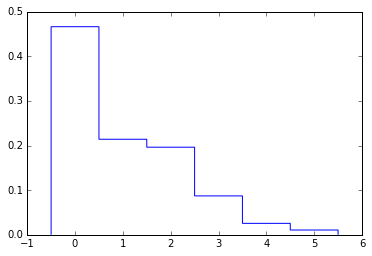

In [82]:
bias_numkdhh = numkdhh.map(unbias)

plt.hist(numkdhh, bins=unique_values, range=[0,unique_values], normed=True, histtype='step', align='left',rwidth=.2)
"""
plt.hist(bias_numkdhh, bins=6, histtype='step', align='left')
"""

By means of built in functions

In [89]:
pmf = thinkstats2.Pmf(numkdhh,label='Unbiased')
pmf_biased = probability.BiasPmf(pmf,label='Biased')

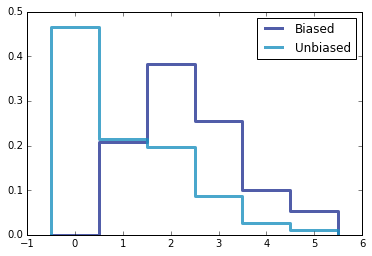

In [90]:
thinkplot.preplot(2)
thinkplot.Pmfs([pmf_biased,pmf])
thinkplot.show()

In [88]:
print ("The mean of the Unbiased PMF is: %s" % pmf.Mean(),"The mean of the Biased PMF is: %s" % pmf_biased.Mean(),sep='\n')

The mean of the Unbiased PMF is: 1.02420515504
The mean of the Biased PMF is: 2.40367910066


# Chapter 4 Exercise 2 (random distribution)

Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [46]:
rand = [random.random() for i in range(1000)]


/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


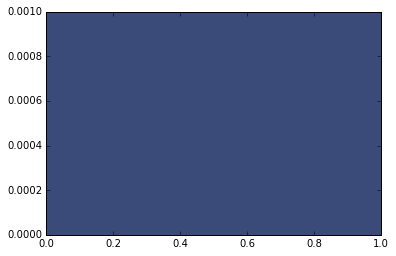

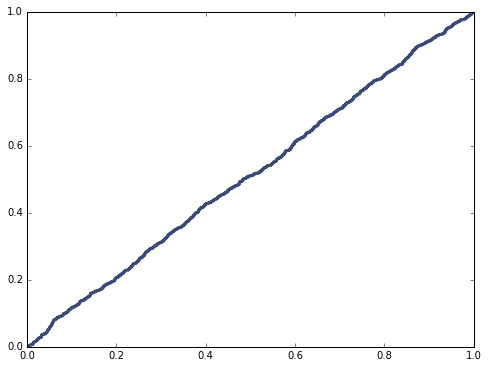

In [48]:
pmf = thinkstats2.Pmf(rand)
thinkplot.Pmf(pmf)
thinkplot.show()
cdf = thinkstats2.Cdf(rand)
thinkplot.Cdf(cdf)
thinkplot.show()

## Think Stats Chapter 5 Exercise 1

For the following exercises, you can start with chap05ex.ipynb. My solu- tion is in chap05soln.ipynb.
Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [26]:
mew = 178
sigma = 7.7
x1 = (5+10/12)*30.48
x2 = (6+1/12)*30.48
dist = stats.norm(loc = mew,scale = sigma)

In [44]:
print("%s percent of the male population is in the range to be in the blue man group." % ((dist.cdf(x2)-dist.cdf(x1))*100))

34.2746837631 percent of the male population is in the range to be in the blue man group.


# Bayesian (Elvis Presley twin)

Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.



# $$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B \mid A) \, P(A) + P(B \mid C) \, P(C)} $$

# $$P(I \mid T) = \frac{P(T \mid I) \, P(I)}{P(T \mid I) \, P(I) + P(T \mid F) \, P(F)} $$

P(A3 | B) = P(B | A3) P(A3)/P(B)

$P(T)$ and $P(I)$ and $P(F)$ are the probabilities of observing TWIN, IDENTICAL, and FRATERNAL without regard to each other.

$P(T | I)$, a conditional probability, is the probability of observing event TWIN given that IDENTICAL is true.

$P(I | T)$ is the probability of observing event IDENTICAL given that TWIN is true.

## Since,

$P(T) = P(I) + P(F)$ assuming FRATERNAL and IDENTICAL twins are mutually exclusive and are the only twin types

$P(T \mid I) = P(T \mid F) = 1$

$P(F \mid T) = 1 - P(I \mid T)$


In [285]:
prob_ftwin = 1/125
prob_itwin = 1/300
prob_twin = prob_ftwin + prob_itwin

True

## Thus,

### $P(I \mid T) = \frac{ \, P(I)}{ \, P(I) +  \, P(F)} $

### $or$

### $P(I \mid T) = \frac{P(I)}  {P(T)}$

Probability of Evis' twin is identical is $29.4\%$

In [351]:
nsim = 10000
is_ftwin_array = stats.binom.random_state.binomial(1,prob_ftwin,size=nsim)
is_itwin_array = stats.binom.random_state.binomial(1,prob_itwin,size=nsim)
is_nottwin = 1-(prob_ftwin+prob_itwin)
twin_array = stats.binom.random_state.choice([0,'f','i'],nsim,p=[is_nottwin,prob_ftwin,prob_itwin])
type(twin_array)

np.ndarray

numpy.ndarray

# Bayesian & Frequentist Comparison

How do frequentist and Bayesian statistics compare?

# Optional Exercises

The following exercises are optional, but we highly encourage you to complete them if you have the time.

# Chapter 7 Exercise 1 (correlation of weight vs. age)

In this exercise, you will compute the effect size of correlation. Correlation measures the relationship of two variables, and data science is about exploring relationships in data.


# Chapter 8 Exercise 2 (sampling distribution)

In the theoretical world, all data related to an experiment or a scientific problem would be available. In the real world, some subset of that data is available. This exercise asks you to take samples from an exponential distribution and examine how the standard error and confidence intervals vary with the sample size.

# Chapter 6 Exercise 1 (skewness of household income)

# Chapter 8 Exercise 3 (scoring)

# Chapter 9 Exercise 2 (resampling)